In [1]:
%load_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings('ignore')

In [7]:
import os
import os.path as path
import numpy as np
import torch
from matplotlib.patches import Rectangle
from glob import glob
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import cv2
import random
import math
import seaborn as sns
sns.set(font_scale=1.5)
from pprint import pprint
from IPython.display import HTML # to show the animation in Jupyter
import pandas as pd
from collections import Counter
from scipy.ndimage import convolve1d

plt.rcParams['xtick.labelsize'] = 11
plt.rcParams['ytick.labelsize'] = 11
sns.set_style("whitegrid", {'axes.grid' : False})
plt.rcParams["figure.autolayout"] = True

In [20]:
import sys
sys.path.append('../')
from utils import utils, RWSampler, dataloader, Inference

### Vanilla

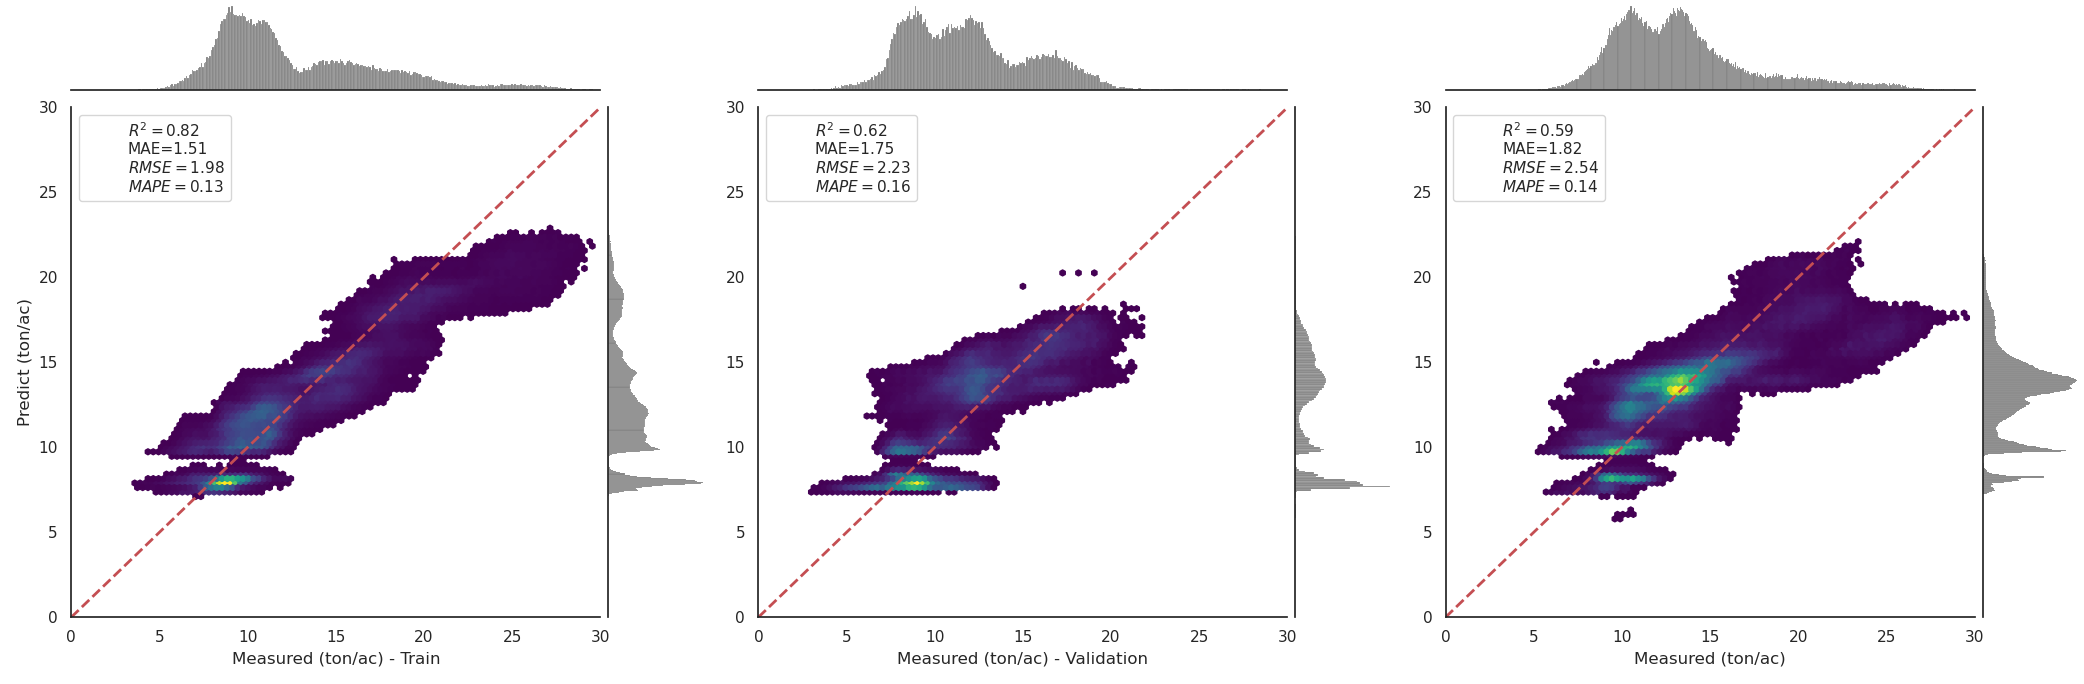

In [3]:
RGB_train_cost_vanilla = pd.read_csv('/data2/hkaman/Imbalance/EXPs/EXP_000_001_05_RGB_vanilla/000_001_05_RGB_vanilla_train.csv',  
                                    index_col=0) 
RGB_valid_cost_vanilla = pd.read_csv('/data2/hkaman/Imbalance/EXPs/EXP_000_001_05_RGB_vanilla/000_001_05_RGB_vanilla_valid.csv',  
                                    index_col=0) 
RGB_test_cost_vanilla = pd.read_csv('/data2/hkaman/Imbalance/EXPs/EXP_000_001_05_RGB_vanilla/000_001_05_RGB_vanilla_test.csv',  
                                    index_col=0) 
_ = Inference.train_val_test_satterplot(RGB_train_cost_vanilla, RGB_valid_cost_vanilla, RGB_test_cost_vanilla, 
                                    week = 15, 
                                    cmap  = 'viridis', 
                                    mincnt = 100, 
                                    fig_save_name = None)

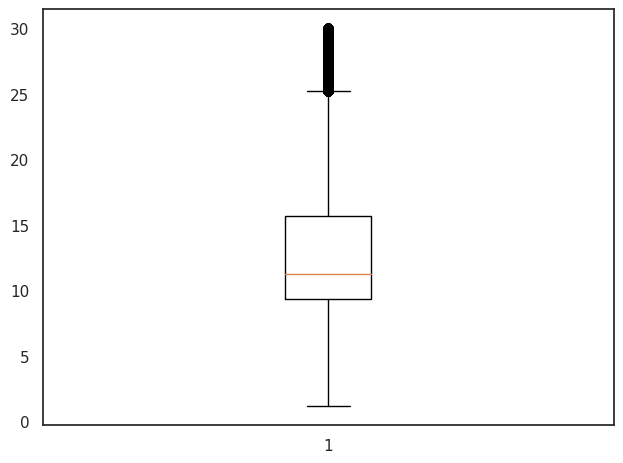

In [8]:
bp = plt.boxplot(RGB_train_cost_vanilla['ytrue'])
None

In [20]:
print("Q2 quantile of arr : ", np.quantile(RGB_train_cost_vanilla['ytrue'], .50))
print("Q1 quantile of arr : ", np.quantile(RGB_train_cost_vanilla['ytrue'], .25))
print("Q3 quantile of arr : ", np.quantile(RGB_train_cost_vanilla['ytrue'], .75))

Q2 quantile of arr :  11.26672
Q1 quantile of arr :  9.344802
Q3 quantile of arr :  15.703003


In [ ]:

from statsmodels.stats.stattools import medcouple
data = np.array(RGB_train_cost_vanilla['ytrue'],  dtype= np.float32)
mc = medcouple(data)
print(mc)

In [21]:
RGB_test_cost_vanilla = pd.read_csv('/data2/hkaman/Imbalance/EXPs/EXP_000_001_05_RGB_vanilla/000_001_05_RGB_vanilla_test.csv',  
                                    index_col=0) 
RGB_test_cost_vanilla_Output = Inference.eval_on_three_main_label_range_pred(RGB_test_cost_vanilla, th1 = 9, th2 = 22)
_ = Inference.eval_on_extreme_main_label_range_pred(RGB_test_cost_vanilla, th1 = 9, th2 = 22)

C1 num samples: 253247 | C2 num samples: 2777403 | C3 num samples: 154758 
C1 is yield value between 0 and 9, C2 is yield value between 9 and 22, and C3 is yield value bigger than 22
All: MAE = 1.82, MAPE = 0.14 | C1: MAE = 2.30, MAPE = 29.99 | C2: MAE = 1.48, MAPE = 11.56 | C3: MAE = 7.10, MAPE = 28.99
Majority range yield: 2777403 | Extreme yield value: 408005
All: MAE = 1.82, MAPE = 0.14 | Cm: MAE = 1.48, MAPE = 11.56 | Cex: MAE = 4.12, MAPE = 29.61


In [8]:
_ = Inference.eval_on_extreme_main_label_range_pred(RGB_test_cost_vanilla, th1 = 8, th2 = 22)

Majority range yield: 2935443 | Extreme yield value: 249965
All: MAE = 1.82, MAPE = 0.14 | Cm: MAE = 1.50, MAPE = 12.11 | Cex: MAE = 5.54, MAPE = 34.47


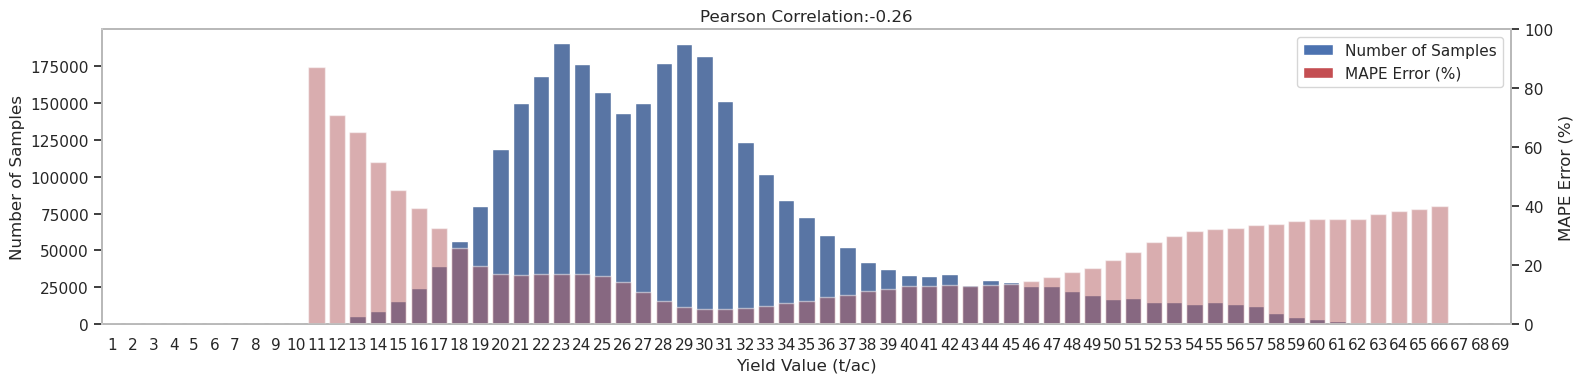

In [23]:
_ = Inference.Erroe_hist_visulization_V2(RGB_test_cost_vanilla)

### Cost Sensitive Weight Resampler 

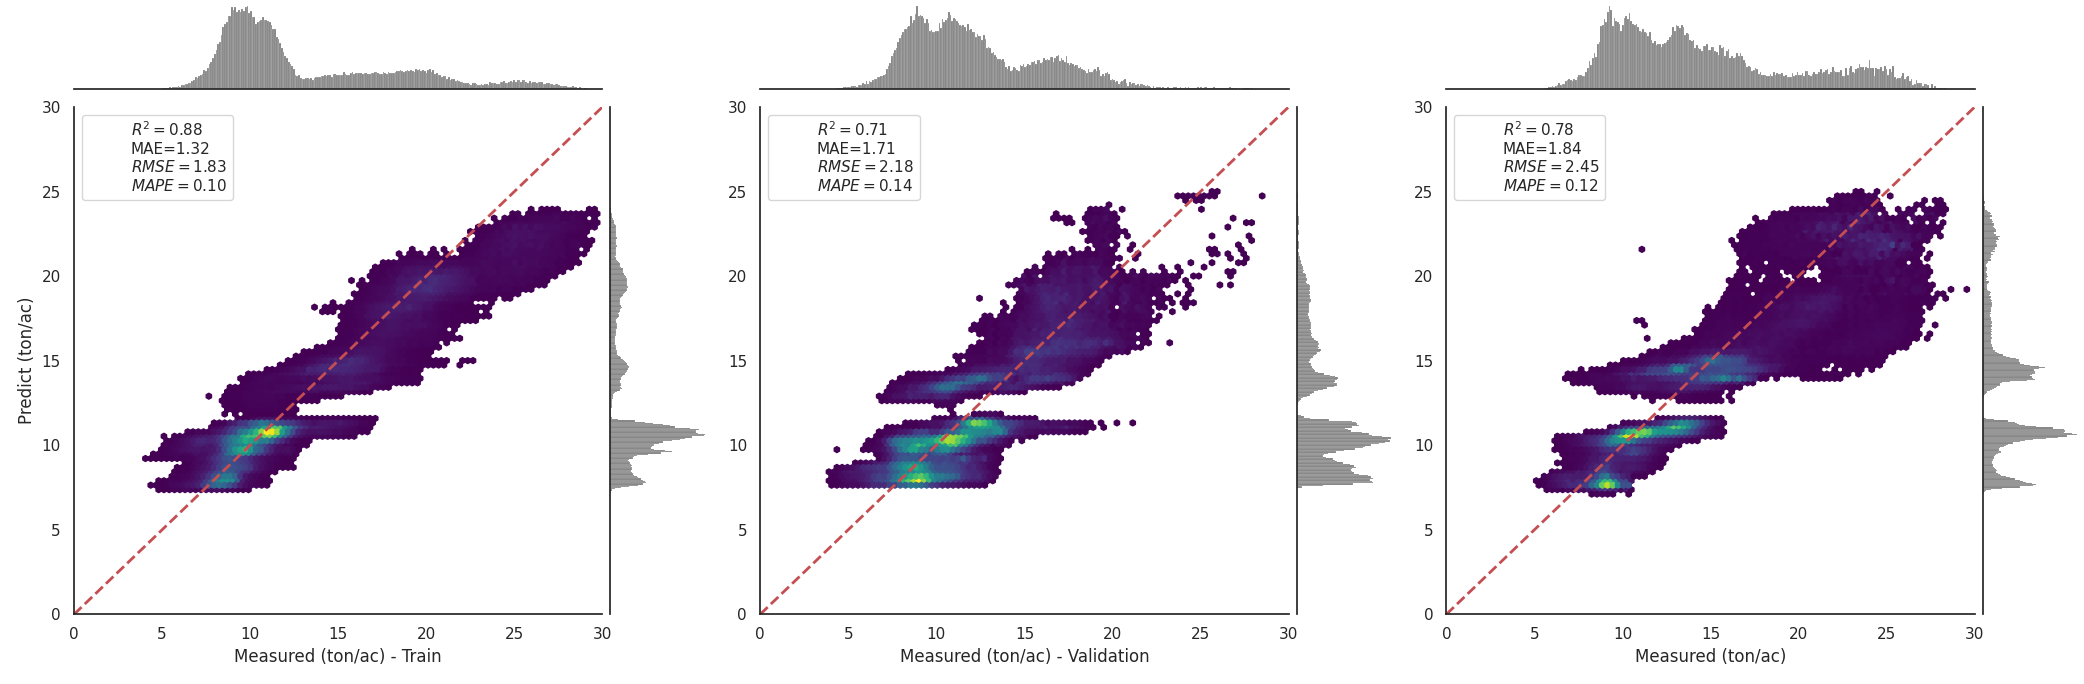

In [23]:
RGB_train_cost_sensitive  = pd.read_csv('/data2/hkaman/Imbalance/EXPs/EXP_001_RGB_BHO/001_RGB_BHO_train.csv',  index_col=0) 
RGB_valid_cost_sensitive  = pd.read_csv('/data2/hkaman/Imbalance/EXPs/EXP_001_RGB_BHO/001_RGB_BHO_valid.csv',  index_col=0) 
RGB_test_cost_sensitive   = pd.read_csv('/data2/hkaman/Imbalance/EXPs/EXP_001_RGB_BHO/001_RGB_BHO_test.csv',  index_col=0) 
_ = Inference.train_val_test_satterplot(RGB_train_cost_sensitive, RGB_valid_cost_sensitive, RGB_test_cost_sensitive, 
                                    week = 15, 
                                    cmap  = 'viridis', 
                                    mincnt = 100, 
                                    fig_save_name = None)

In [4]:
RGB_test_cost_sensitive   = pd.read_csv('/data2/hkaman/Imbalance/EXPs/EXP_001_RGB_BHO/001_RGB_BHO_test.csv',  index_col=0) 
RGB_test_cost_sensitive_Output = Inference.eval_on_three_main_label_range_pred(RGB_test_cost_sensitive, th1 = 9, th2 = 22)
_ = Inference.eval_on_extreme_main_label_range_pred(RGB_test_cost_sensitive, th1 = 9, th2 = 22)

C1 num samples: 304430 | C2 num samples: 2446713 | C3 num samples: 434265 
C1 is yield value between 0 and 9, C2 is yield value between 9 and 22, and C3 is yield value bigger than 22
All: MAE = 1.84, MAPE = 0.12 | C1: MAE = 1.20, MAPE = 15.46 | C2: MAE = 1.58, MAPE = 11.49 | C3: MAE = 3.74, MAPE = 15.13
Majority range yield: 2446713 | Extreme yield value: 738695
All: MAE = 1.84, MAPE = 0.12 | Cm: MAE = 1.58, MAPE = 11.49 | Cex: MAE = 2.70, MAPE = 15.27


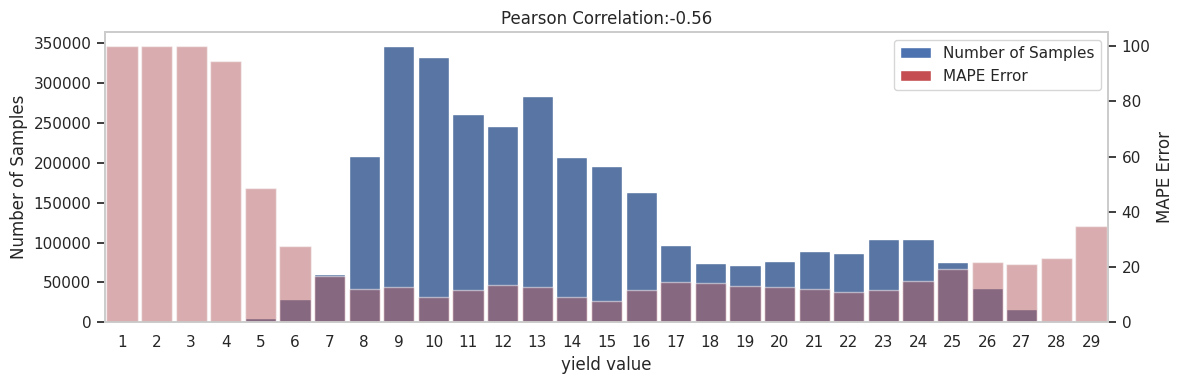

In [17]:
_ = Inference.Erroe_hist_visulization_V2(RGB_test_cost_sensitive)

In [34]:
train_coord = pd.read_csv('/data2/hkaman/Imbalance/EXPs/EXP_000_001_05_RGB_vanilla/coords/train.csv', index_col = 0)
avg_weights, avg_stds = RWSampler.check_cost_sensitive_reweighting(train_coord).return_pixelwise_weight()

In [15]:
cost_sensitive_effective_sample_nums, mape_errors = Inference.return_samples_error_per_bins(RGB_test_cost_sensitive)
vanilla_sample_nums, mape_errors                  = Inference.return_samples_error_per_bins(RGB_test_cost_vanilla)

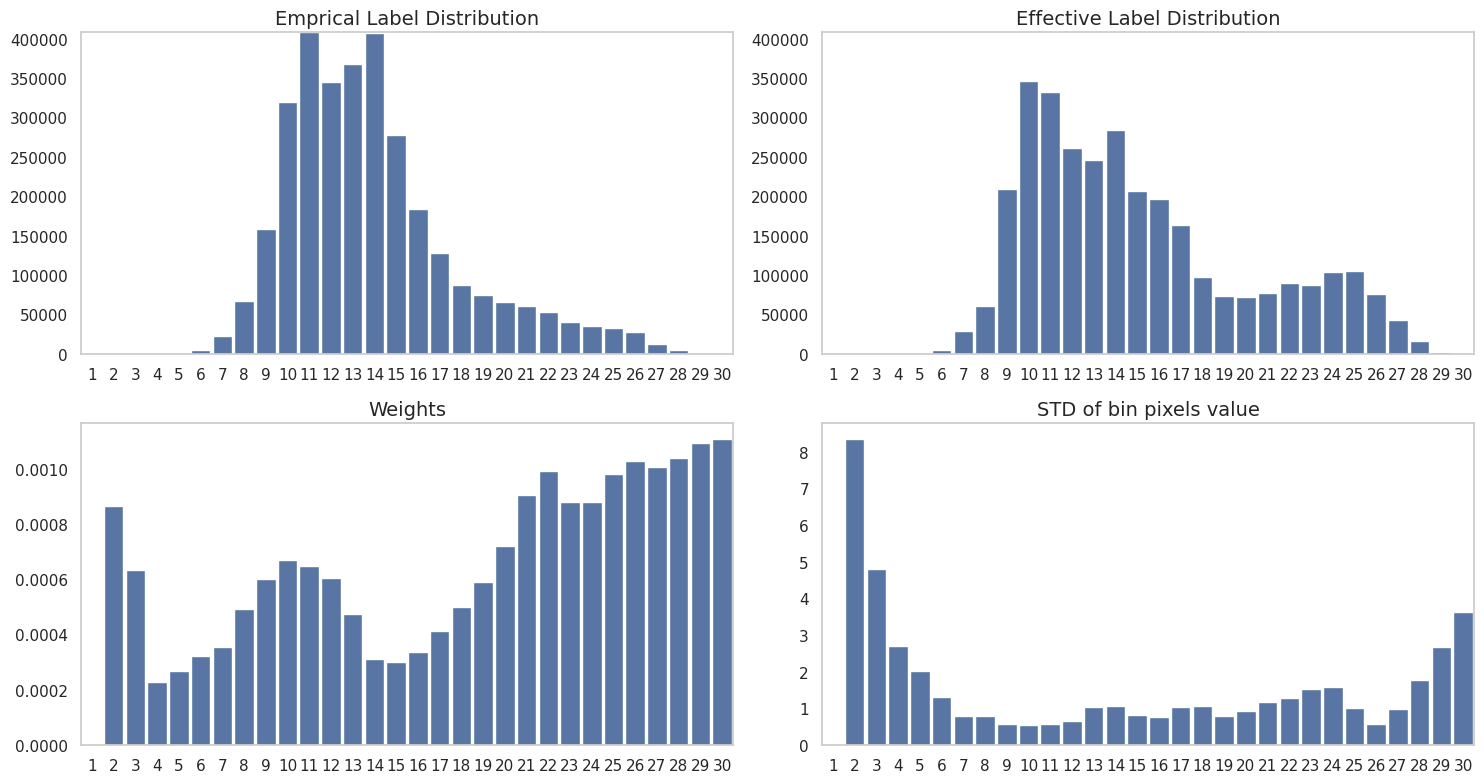

In [35]:
_ = utils.cs_emp_effective_we_std_hist_plot(vanilla_sample_nums, cost_sensitive_effective_sample_nums, avg_weights, avg_stds)